In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

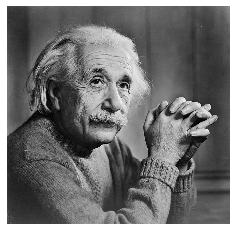

the imag size = (625, 640)


In [2]:
img = plt.imread("Einstein.jpg")
plt.imshow(img, cmap = 'gray')
plt.axis('off')
plt.show()
print("the imag size = {}".format(img.shape))

In [3]:
# reconstruct the img by SVD
def reconstr_SVD(left_u, sigma, right_v):
    temp = np.dot(left_u, sigma)
    A_svd = np.dot(temp,np.transpose(right_v))
    return A_svd

# sort the eigvectors and eigvalues from max to min
def sort_eig(eig_val, eig_vec):
    index = np.argsort(-eig_val)
    return eig_val[index], eig_vec[:,index]


# decompose a matrix A by SVD
def decompose_SVD(A, num_remain = None):
    #obtain the matrix of A.T*A
    square_A = np.dot(np.transpose(A/256),A/256)
    #obtain the eigvalues and eigvectors and sort them
    eig_val, eig_vec = np.linalg.eig(square_A)
    # note that eig_val and eig_vectors are complex arrays at last step
    eig_val, eig_vec = sort_eig(np.real(eig_val), np.real(eig_vec))
    
    # default just solves non-zero eigvalues problem
    if num_remain == None:
        len_cut = np.sum(eig_val > 0)
    else:
        len_cut = num_remain
    # sometimes, python gives the negative values when approaching to zero
    sigma, right_v = np.diag(eig_val[:len_cut]**0.5), eig_vec[:,:len_cut]
    
    # acquire the left singular vectors by A*V = U*diag(sigma)
    left_u = np.dot(np.dot(A, right_v),np.linalg.inv(sigma)) 
    
    return left_u, sigma, right_v

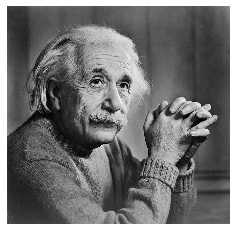

In [4]:
# to reconstruct the image by SVD
left_u, sigma, right_v = decompose_SVD(img)
img_reduction = reconstr_SVD(left_u, sigma, right_v).astype("uint8")

plt.imshow(img_reduction, cmap = 'gray')
plt.axis('off')
plt.show()

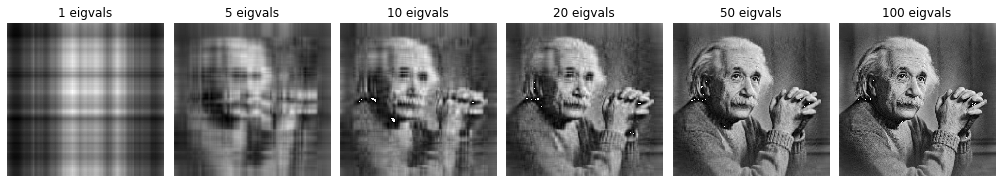

In [5]:
# n by n to see the result of reconstruction
fig, axes = plt.subplots(1,6,figsize = (14,4))

for ax, n in zip(axes.ravel(),[1,5,10,20,50,100]):
    left_u, sigma, right_v = decompose_SVD(img,n)
    img_new = reconstr_SVD(left_u, sigma, right_v).astype("uint8")
    ax.imshow(img_new, cmap = 'gray')
    ax.axis('off'), ax.set_title("{} eigvals".format(n))

plt.tight_layout(True)
plt.show()